In [48]:
#importing libraries into jupyter notebook
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import math

#specifying the path and file name
file = './OJ_Data.xlsx'

#reading the file into Python
OJ_data = pd.read_excel(file)



In [49]:
#log transformation sales
OJ_data['log_sales1'] = np.log(OJ_data['sales1'])
OJ_data['log_sales2'] = np.log(OJ_data['sales2'])
OJ_data['log_sales3'] = np.log(OJ_data['sales3'])
OJ_data['log_sales4'] = np.log(OJ_data['sales4'])
OJ_data['log_sales5'] = np.log(OJ_data['sales5'])

#log transformation price
OJ_data['log_price1'] = np.log(OJ_data['price1'])
OJ_data['log_price2'] = np.log(OJ_data['price2'])
OJ_data['log_price3'] = np.log(OJ_data['price3'])
OJ_data['log_price4'] = np.log(OJ_data['price4'])
OJ_data['log_price5'] = np.log(OJ_data['price5'])


In [50]:
#step 1: build a model
lm_best = smf.ols(formula = """log_sales5 ~   log_price1 + log_price2
                                            + log_price3 + log_price4
                                            + log_price5 + disp5 
                                            + feat5 """,
                  data = OJ_data)
#step 2: fit the model based on the data
results = lm_best.fit()

#step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales5   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     30.94
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.05e-23
Time:                        19:58:17   Log-Likelihood:                -118.15
No. Observations:                 116   AIC:                             252.3
Df Residuals:                     108   BIC:                             274.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5951      2.166     -0.275      0.7

In [51]:
#storing the regression coef into a new variable
coef_intercept  = results.params.Intercept 
coef_log_price1 = results.params.log_price1
coef_log_price2 = results.params.log_price2
coef_log_price3 = results.params.log_price3
coef_log_price4 = results.params.log_price4
coef_log_price5 = results.params.log_price5
coef_disp5      = results.params.disp5
coef_feat5      = results.params.feat5

#print the values of the stored coeficients
print(" Intecept Coeficient   : ", coef_intercept)
print(" Log Price 1 Coeficient: ", coef_log_price1)
print(" Log Price 2 Coeficient: ", coef_log_price2)
print(" Log Price 3 Coeficient: ", coef_log_price3)
print(" Log Price 4 Coeficient: ", coef_log_price4)
print(" Log Price 5 Coeficient: ", coef_log_price5)
print(" Display 5 Coeficient  : ", coef_disp5)
print(" Feature 5 Coeficient  : ", coef_feat5)

 Intecept Coeficient   :  -0.5951496836620813
 Log Price 1 Coeficient:  0.09852611509335407
 Log Price 2 Coeficient:  -1.6636743878682179
 Log Price 3 Coeficient:  1.0508255510249171
 Log Price 4 Coeficient:  1.1025402455544617
 Log Price 5 Coeficient:  -3.241612360035744
 Display 5 Coeficient  :  0.28179399552533835
 Feature 5 Coeficient  :  0.6590307939084683


In [52]:
#пetting average for price
average_price1 = OJ_data["price1"].mean()
average_price2 = OJ_data["price2"].mean()
average_price3 = OJ_data["price3"].mean()
average_price4 = OJ_data["price4"].mean()
average_price5 = OJ_data["price5"].mean()

#зrinting average price
print(" Average Price 1: ", average_price1)
print(" Average Price 2: ", average_price2)
print(" Average Price 3: ", average_price3)
print(" Average Price 4: ",average_price4)
print(" Average Price 5: ",average_price5)

 Average Price 1:  0.04532140844741382
 Average Price 2:  0.05003320281637934
 Average Price 3:  0.035965532012931
 Average Price 4:  0.03544042484137931
 Average Price 5:  0.026779364224137917


In [53]:
#пetting average ln price
average_log_price1 = np.log(average_price1)
average_log_price2 = np.log(average_price2)
average_log_price3 = np.log(average_price3)
average_log_price4 = np.log(average_price4)
average_log_price5 = np.log(average_price5)

#printштп average ln price
print(" Average Log Price 1: ", average_log_price1)
print(" Average Log Price 2: ", average_log_price2)
print(" Average Log Price 3: ", average_log_price3)
print(" Average Log Price 4: ", average_log_price4)
print(" Average Log Price 5: ", average_log_price5)

 Average Log Price 1:  -3.0939757654717464
 Average Log Price 2:  -2.995068437614246
 Average Log Price 3:  -3.3251942432536383
 Average Log Price 4:  -3.339902165693538
 Average Log Price 5:  -3.620123679697792


In [54]:
#calculating the equation of ln(sales5)
LN_sales5 = coef_intercept + coef_log_price1 * average_log_price1 + coef_log_price2 * average_log_price2 + coef_log_price3 * average_log_price3 + coef_log_price4 * average_log_price4 + coef_log_price5 * average_log_price5

print("LN_sales5: ", LN_sales5)

LN_sales5:  8.641293591687223


In [55]:
#takeing the exponent to get sales5
sales_5 = math.exp(LN_sales5)
print("sales_5: ", sales_5)

sales_5:  5660.647657025278


In [56]:
#calculating sales5 for oz
sales_5oz = sales_5 * 64
print("sales_5oz: ", sales_5oz)

sales_5oz:  362281.4500496178


In [57]:
#calculating the revenue
revenue_sku5 = sales_5oz * average_price5
print("revenue: ", revenue_sku5)

revenue:  9701.666902527542


In [58]:
#step 1: build a model
lm_gmr5 = smf.ols(formula =  "grmar5 ~ price5",
                                data = OJ_data)

#step 2: fit the model based on the data
results_gmr5 = lm_gmr5.fit()

#step 3: analyze the summary output
print(results_gmr5.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar5   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           8.42e-21
Time:                        19:58:26   Log-Likelihood:                 107.27
No. Observations:                 116   AIC:                            -210.5
Df Residuals:                     114   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2007      0.044     -4.579      0.0

In [59]:
#storing the regression coef into a new variable

coef_gmr_intercept = results_gmr5.params.Intercept
coef_gmr_price5 = results_gmr5.params.price5

#print the values of the stored coeficients
print(" coef_gmr_intercept: ", coef_gmr_intercept)
print(" coef_gmr_price5   : ", coef_gmr_price5)

 coef_gmr_intercept:  -0.20067635142037138
 coef_gmr_price5   :  18.431514737733696


In [60]:
gmr_price5 = coef_gmr_intercept + coef_gmr_price5 * average_price5

print("gmr_price5: ", gmr_price5)

gmr_price5:  0.29290789494396513


In [61]:
profit_sku5 = gmr_price5 * revenue_sku5
print("profit_sku5: ", profit_sku5)

profit_sku5:  2841.694829866881


<AxesSubplot:xlabel='Price oz', ylabel='Profits'>

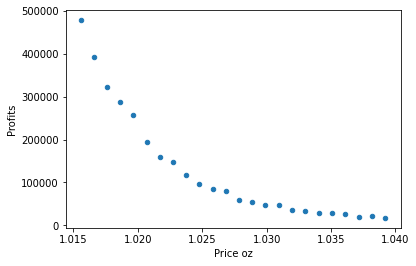

In [63]:
#setting the Seed
np.random.seed(42)

#run 1000 simulations
num_simulations = 1000

price5_min = OJ_data.price5.min()
price5_max = OJ_data.price5.max()

Q_stats = []

for Q in np.arange(price5_min, price5_max, 0.001):

# Create an array to save results from each simulation
    all_stats = []

    for i in range (num_simulations):
        coef_current= np.random.normal(coef_log_price5, results.bse[5])
        
        simulation_log_sales5 = coef_intercept + coef_log_price1 * average_log_price1 + coef_log_price2 * average_log_price2 + coef_log_price3 * average_log_price3 + coef_log_price4 * average_log_price4 + coef_current * np.log(Q) + 0 + 0
        
        simualtion_profits5 = math.exp(simulation_log_sales5) * gmr_price5 * average_grmar5 * 64
        
        all_stats.append([math.exp(simulation_log_sales5), simualtion_profits5])
        
    results_df = pd.DataFrame.from_records(all_stats, columns = ['simulation_log_sales5', 'simualtion_profits5'])
    Q_stats.append([math.exp(Q), results_df['simualtion_profits5'].mean()])
    
Q_results_df = pd.DataFrame.from_records(Q_stats, columns = ['Price oz', 'Profits'])
    
Q_results_df.plot.scatter(x = "Price oz", y = "Profits")



In [64]:
#calculating optimal price
print(Q_results_df[Q_results_df.Profits == Q_results_df.Profits.max()])

   Price oz        Profits
0  1.015589  477682.418257


To gain maximal profit the price per oz of juice should be 1.015589